# Import libraries

In [21]:
%load_ext autoreload
%autoreload 2

from spectroscopy_lib.interface import LinienHardwareInterface
from spectroscopy_lib.LaserLockController import LaserLockController

from linien_common.common import  MHz, Vpp


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# SETUP CONFIG

Inside the spectroscopy_lib folder you will find a linien_connect_config.yaml file, you will need to update it with your data before running the next cell

In [22]:
RP_interface = LinienHardwareInterface()
#RP_interface.set_debug_mode()

2025-11-25 11:58:42 - LinienHardwareInterface - INFO - Configuration loaded from /home/bec3/Desktop/Simone_Damian/Serafini/spectroscopy_lib/linien_connect_config.yaml:

2025-11-25 11:58:42 - LinienHardwareInterface - INFO - Attempting connection via local_host address (192.168.1.159:18862)


linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       ERROR    Server is not running. Launching it!


2.1.0


linien_client.deploy           DEBUG    Sending credentials
linien_client.deploy           DEBUG    Starting server


linien_server.cli              DEBUG    Copied linien-server.service to /etc/systemd/system
linien_server.cli              INFO     Starting Linien server
linien_server.cli              INFO     Started Linien server


linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       DEBUG    Sent authentication hash
linien_client.connection       INFO     Connection established!


2025-11-25 11:58:53 - LinienHardwareInterface - INFO - Connected to device via local_host address


## Laser diode temperature set

To use the oscilloscope to find the lines and avoiding the mode jumps start the sweep and regulate the laser temperature reacing the desired stability.

In [23]:
RP_interface.start_sweep()

## Parameters initialization

Once successfully connected to RP you will feed the hardware interface you just created to the LaserLockController
However, you first need to change the initialization parameters of the server in linien_params_config.yaml according to you exp setup.

In [24]:
RP_controller = LaserLockController(RP_interface)

2025-11-25 11:59:05 - LinienDataHandler - INFO - All reference lines loaded successfully.
2025-11-25 11:59:05 - LaserLockController - INFO - LaserLockController initialized successfully.


In [26]:
RP_interface.get_param("modulation_amplitude")
RP_interface.set_param("modulation_amplitude", 0.5)
RP_interface.get_param("modulation_amplitude")


0.5

In [37]:
params = RP_interface.client.parameters
for name, param in vars(params).items():
    # Only pick those attributes that are actual Linien parameters
    if hasattr(param, "value"):
        print(f"{name}: {param.value}")

_async_changed_parameters_queue: []
to_plot: b'\x80\x04\x95\xec \x00\x00\x00\x00\x00\x00}\x94(\x8c\x0eerror_signal_1\x94\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01M\x00\x08\x85\x94h\x05\x8c\x05dtype\x94\x93\x94\x8c\x02i2\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01<\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94b\x89B\x00\x10\x00\x00\x02\x00\x12\x00\x11\x00\x11\x00\x11\x00\x11\x00\x11\x00\x11\x00\x11\x00\x11\x00\x11\x00\x11\x00\x11\x00\x11\x00\x11\x00\x12\x00\x11\x00\x11\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x13\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x12\x00\x11\x00\x11\x00\x11\x00\x11\x00\x12\x00\x11\x00\x11\x00\x11\x00\x11\x00\x11\x00\x11\x00\x10\x00\x11\x00\x11\x00\x11\x0

## Reference lines capture

You will now perform a scan of the entire available range through the big offset, ie the wide range analog out, and will see the resulting signal.

2025-11-25 11:53:55 - LaserLockController - INFO - Starting scan from 0.9V to 1V with 10 points.


2025-11-25 11:53:57 - LinienHardwareInterface - DEBUG - Sweep signal received from server.
Scanning at voltage 0.900V (1/10) [#---------] (1.31s)2025-11-25 11:53:58 - LinienHardwareInterface - DEBUG - Sweep signal received from server.
Scanning at voltage 0.911V (2/10) [##--------] (2.93s)2025-11-25 11:53:59 - LinienHardwareInterface - DEBUG - Sweep signal received from server.
Scanning at voltage 0.922V (3/10) [###-------] (4.29s)2025-11-25 11:54:01 - LinienHardwareInterface - DEBUG - Sweep signal received from server.
Scanning at voltage 0.933V (4/10) [####------] (5.59s)2025-11-25 11:54:03 - LinienHardwareInterface - DEBUG - Sweep signal received from server.
Scanning at voltage 0.944V (5/10) [#####-----] (7.30s)2025-11-25 11:54:04 - LinienHardwareInterface - DEBUG - Sweep signal received from server.
Scanning at voltage 0.956V (6/10) [######----] (8.76s)2025-11-25 11:54:05 - LinienHardwareInterface - DEBUG - Sweep signal received from server.
Scanning at voltage 0.967V (7/10) [####

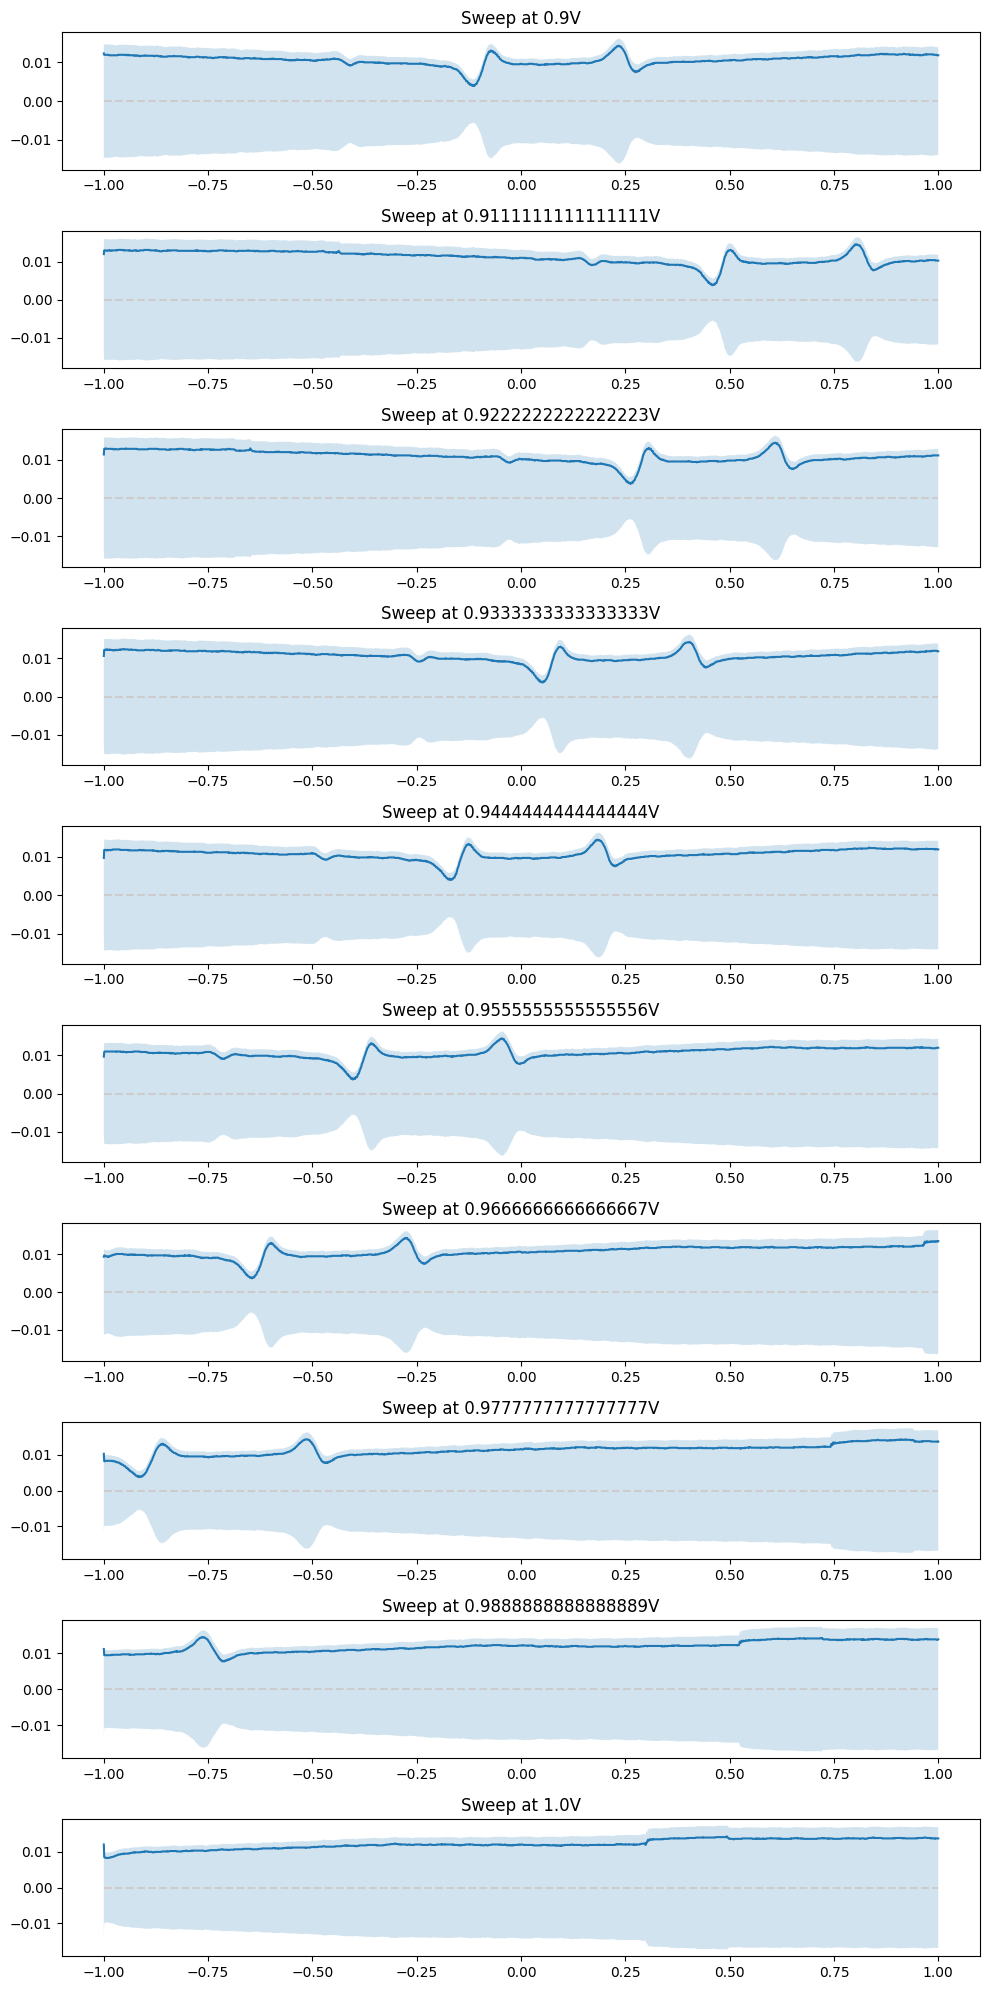

In [6]:
#RP_controller.hardware_interface.unset_debug_mode()
RP_controller.scan_lines(start_voltage= .9, stop_voltage= 1, num_points= 10)

You now need to identify at which V_scan the three features of you spectra have appeared, and save them to three distinct reference files.
Set False to True if want to save new reference lines.
- key gives a label to the reference line
- V_scan is the value of the offset voltage corresponding to the sweep where you have found the reference line
- [start_voltage,stop_voltage] is the region where you want to save the reference line(ie cut out where the sweep is simply flat)
- [V_lock_start,V_lock_end] is the region of the lock (ie before the minimum and after the maximum of the locking line)

2025-11-25 11:54:28 - LaserLockController - INFO - Saving reference line with key feature_1.
2025-11-25 11:54:28 - LinienDataHandler - INFO - Saved reference line: REFERENCE_LINE_feature_1.npy
2025-11-25 11:54:28 - LinienDataHandler - INFO - All reference lines loaded successfully.


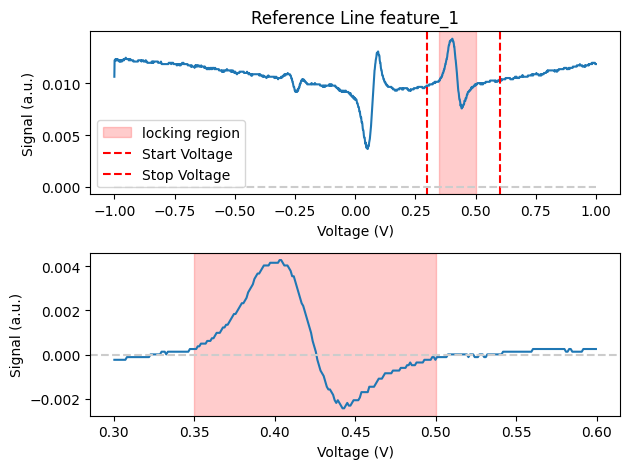

2025-11-25 11:54:29 - LaserLockController - INFO - Reference line feature_1 saved successfully.


In [8]:
if True:
    #RP_controller.reset_reference_lines()
    # replace the key and V_scan with the appropriate values for your features
    # offset has to be intended as the offset that has to be applied to the fist signal plot in order to have the zero crossing at 0V
    RP_controller.save_reference_line(key = 'feature_1', V_scan = 0.933, start_voltage=0.3, stop_voltage=0.6, V_lock_start = 0.35, V_lock_end = 0.5, offset=-0.01)

We will now make the software identify where the reference lines are, in practice it will scan again the frequency but this time it will try to recognize the presence of the reference lines just saved.

## Finding the reference lines autonomously

2025-11-25 11:59:55 - LaserLockController - INFO - Finding reference lines.
2025-11-25 11:59:55 - LaserLockController - DEBUG - Setting voltage to 0.9V


2025-11-25 11:59:55 - LinienHardwareInterface - DEBUG - Sweep signal received from server.
2025-11-25 11:59:55 - LaserLockController - DEBUG - Correlation with LINE_feature_1 at 0.9V: 0.6203470023478688, Length of match: 0.44771241830065434, offset with respect to the reference signal: 0.00851811906305863
2025-11-25 11:59:55 - LaserLockController - DEBUG - Setting voltage to 0.91V
2025-11-25 11:59:57 - LinienHardwareInterface - DEBUG - Sweep signal received from server.
2025-11-25 11:59:57 - LaserLockController - DEBUG - Correlation with LINE_feature_1 at 0.91V: 0.5229436192699048, Length of match: 0.44771241830065434, offset with respect to the reference signal: 0.009307729522339214
2025-11-25 11:59:57 - LaserLockController - DEBUG - Setting voltage to 0.92V
2025-11-25 11:59:58 - LinienHardwareInterface - DEBUG - Sweep signal received from server.
2025-11-25 11:59:58 - LaserLockController - DEBUG - Correlation with LINE_feature_1 at 0.92V: 0.33810203660649873, Length of match: 0.44771

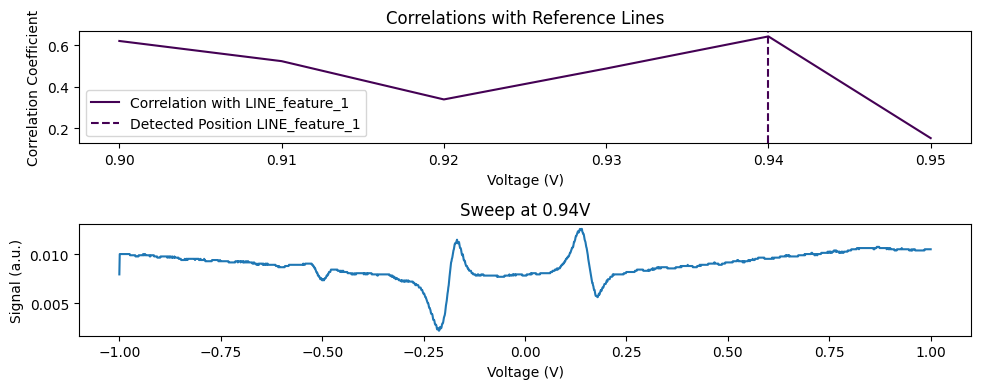

2025-11-25 12:00:03 - LaserLockController - INFO - Reference lines found successfully.


In [28]:
RP_controller.set_debug_mode()
RP_controller.find_reference_lines(start_voltage= 0.9, stop_voltage= 0.95, num_points = 6)

## Center the desired line and lock

We will now try to center a specific line. To do this you will need to choose a key which is the one corresponding to the line you saved

In [30]:
import pickle

In [33]:
c = RP_controller.hardware_interface.client
to_plot = c.parameters.to_plot.value
to_plot = pickle.loads(to_plot)
print(to_plot.keys())
locked = c.parameters.lock.value
print(f"Locked: {locked}")

dict_keys(['error_signal_1', 'monitor_signal', 'slow_control_signal'])
Locked: False


In [36]:
RP_interface.get_sweep()
sweep_data = RP_interface.get_sweep()
import matplotlib.pyplot as plt
plt.plot(sweep_data['voltage'], sweep_data['signal'])

TimeoutError: Timeout while waiting for parameter to_plot to update.

In [281]:
import pickle
import matplotlib.pyplot as plt
RP_interface.start_sweep()
RP_interface.get_sweep()
c= RP_controller.hardware_interface.client
c.parameters.check_for_changed_parameters()
plot_data = pickle.loads(c.parameters.to_plot.value)
print(plot_data.keys())
plt.plot(plot_data['error_signal_1'])

KeyboardInterrupt: 

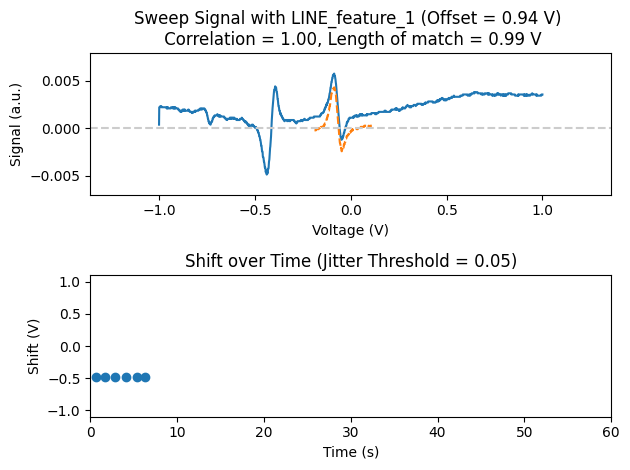

2025-11-25 12:00:16 - LaserLockController - DEBUG - Frequency stable enough
2025-11-25 12:00:16 - LaserLockController - INFO - Line LINE_feature_1 is centered at offset 0.94.
Started autolock
2025-11-25 12:00:16 - LaserLockController - INFO - Locking the laser worked \o/


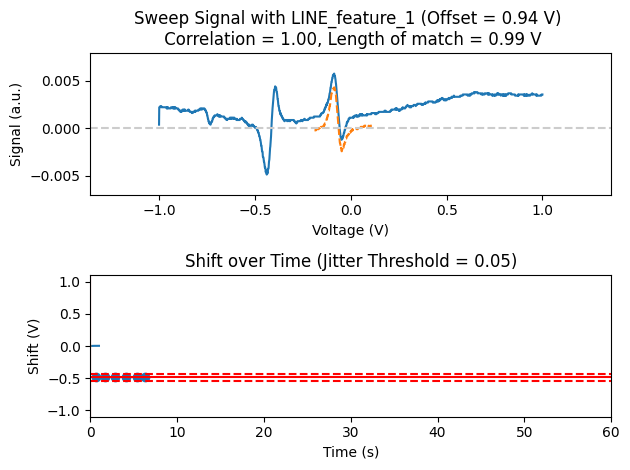

In [29]:
line_key = 'LINE_feature_1'  # replace with the LINE_key of the line you want to center
RP_controller.set_debug_mode()

RP_controller.center_and_lock_v1(line_key)